# EDA Operations

**Business Problem** <br>
Iyzico is a financial technology company that facilitates the online shopping experience for both buyers and sellers. It provides payment infrastructure for e-commerce companies, marketplaces, and individual users. An estimation is expected to be made for the total transaction volume on a merchant_id and daily basis for the last 3 months of 2020. <br>
**Dataset** <br>
* transaction_date: Selling date
* merchant_id: IDs of member merchants (unique numbers for each member merchant)
* Total_Transaction: Transaction number
* Total_Paid: Total paid

## Load Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("datasets/iyzico_data.csv", parse_dates=True)

In [3]:
df.head()

,Unnamed: 0,transaction_date,merchant_id,Total_Transaction,Total_Paid
0,0,2018-01-01,535,349,25883.226
1,1,2018-01-01,42616,141,40918.860
2,2,2018-01-01,46774,410,306902.700
3,3,2018-01-01,86302,10,11.340
4,4,2018-01-01,124381,285,111383.766


In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.dtypes

transaction_date      object
merchant_id            int64
Total_Transaction      int64
Total_Paid           float64
dtype: object

In [6]:
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

## Understand Data

In [7]:
df["transaction_date"].min(), df["transaction_date"].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2020-12-31 00:00:00'))

Datasets includes date between *2018-01-01 and 2020-12-31*.

In [8]:
df.merchant_id.unique()

array([   535,  42616,  46774,  86302, 124381, 129316,  57192],
      dtype=int64)

Company has got 7 different merchants.

### What is total transaction on merchant?

In [9]:
df.groupby("merchant_id").agg({"Total_Transaction": ["sum"]})

,Total_Transaction
,sum
merchant_id,
535,1302725
42616,1126191
46774,1599559
57192,1146440
86302,840951
124381,1935357
129316,440029


### What is total paid price on merchant?

In [10]:
df.groupby("merchant_id").agg({"Total_Paid": ["sum"]})

,Total_Paid
,sum
merchant_id,
535,1.566015e+08
42616,3.545831e+08
46774,1.567200e+09
57192,3.173371e+08
86302,2.870447e+06
124381,1.158693e+09
129316,1.555471e+06


### Summary

In [11]:
grouped_df = df.groupby(["transaction_date", "merchant_id"]).agg({"Total_Transaction": ["sum"]})

In [12]:
grouped_df.head()

Total_Transaction
                                           sum
transaction_date merchant_id                  
2018-01-01       535                       349
                 42616                     141
                 46774                     410
                 86302                      10
                 124381                    285

In [13]:
import plotly.express as px

In [14]:
merchants = df["merchant_id"].unique()

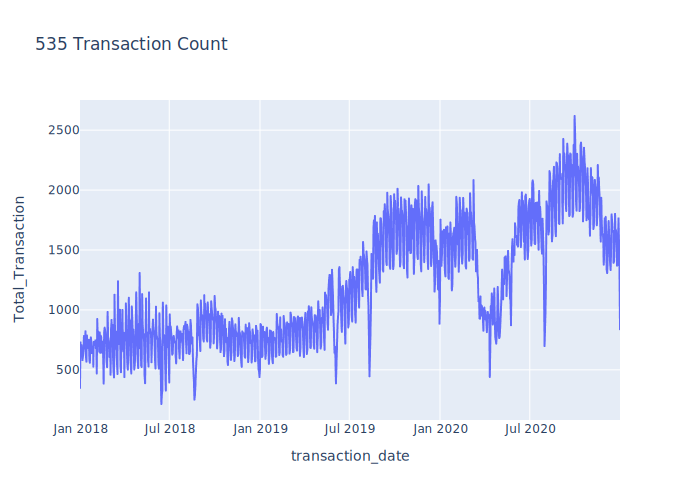

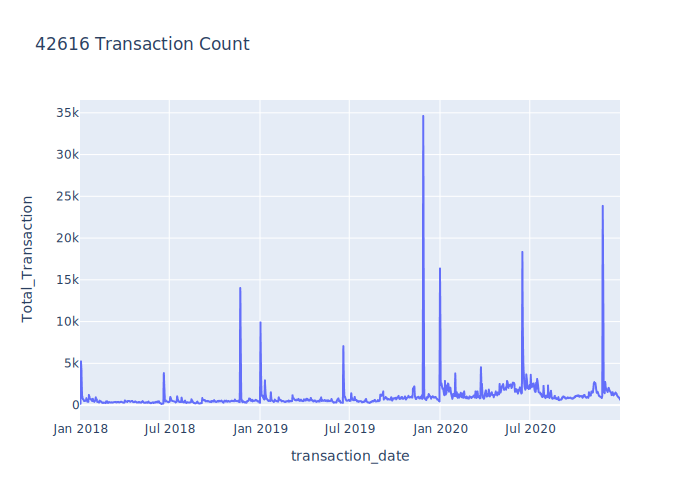

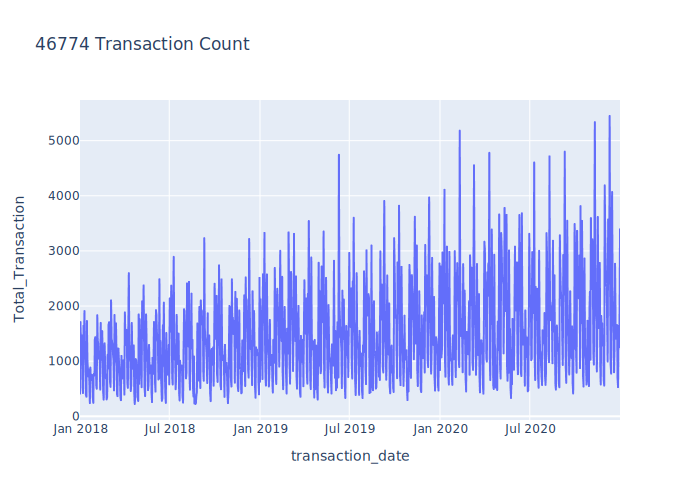

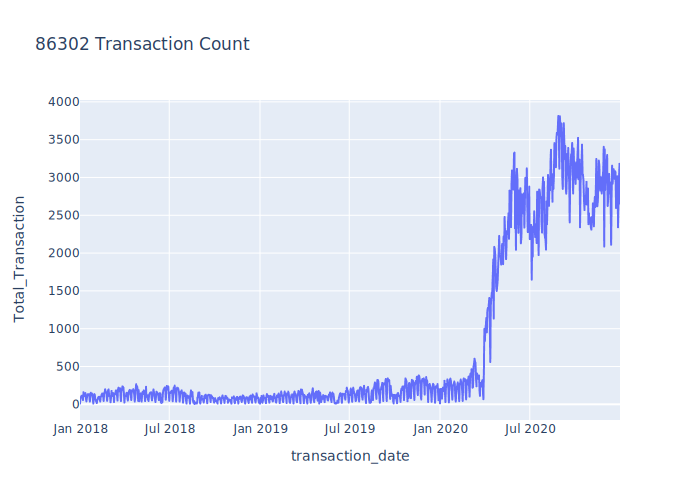

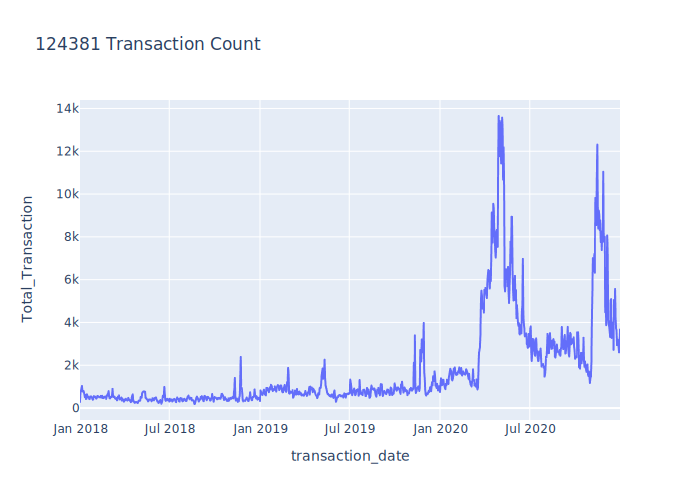

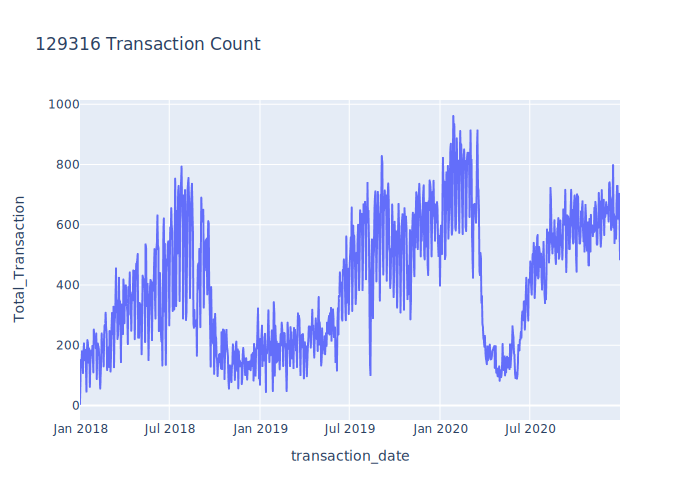

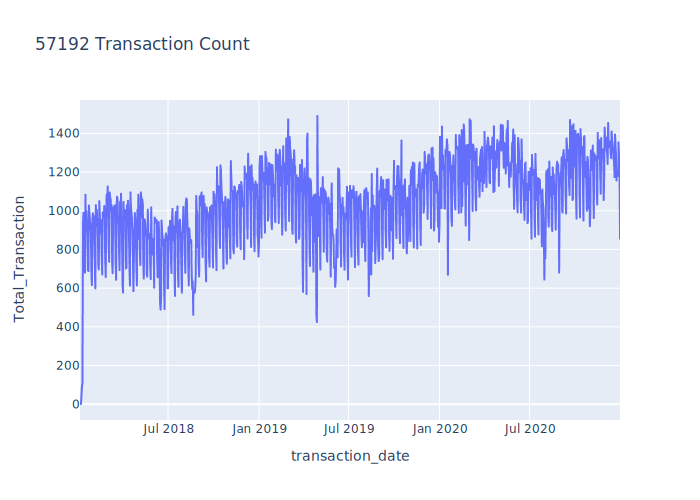

In [15]:
for merchant in merchants:
    transaction_df = df[df["merchant_id"] == merchant][["transaction_date","Total_Transaction"]]
    fig = px.line(transaction_df, x='transaction_date', y='Total_Transaction', 
                  title=f"{merchant} Transaction Count")
    fig.show(renderer='svg')

In [16]:
df.to_csv("datasets/eda.csv", index=False)